<a href="https://colab.research.google.com/github/vvrgit/Aquaculture/blob/main/Aquaculture_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras  #Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop,Adadelta,SGD,Adagrad,Adam,Adamax,Nadam
#import pylab as plt
#import seaborn as sns #For data visualization
import pandas as pd # For Data manipulation

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [46]:
dataframe = pd.read_excel("/content/drive/MyDrive/AI Data/WQD.xlsx")
dataframe.head()

,Temp,Turbidity (cm),DO(mg/L),BOD (mg/L),CO2,pH`,Alkalinity (mg L-1 ),Hardness (mg L-1 ),Calcium (mg L-1 ),Ammonia (mg L-1 ),Nitrite (mg L-1 ),Phosphorus (mg L-1 ),H2S (mg L-1 ),Plankton (No. L-1),Water Quality
0,67.448725,10.127148,0.208153,7.473607,10.181084,4.751657,218.364855,300.125080,337.178226,0.286054,4.355310,0.005984,0.066793,6069.624017,2
1,64.626666,94.015595,11.434463,10.859998,14.860521,3.085154,273.939692,8.426776,363.660740,0.096040,2.182753,0.004906,0.023428,250.995959,2
2,65.121842,90.653462,12.430865,12.809970,12.319980,9.648515,220.812730,11.726274,309.370934,0.974501,4.901760,0.006979,0.065041,7218.927473,2
3,1.640334,0.066344,10.963529,8.508023,12.955209,4.819988,266.571628,6.627655,8.180468,0.884865,3.571842,3.174473,0.026018,1230.062252,2
4,64.863434,2.119173,1.361736,13.335372,13.603197,10.244034,252.108000,339.891514,253.996871,0.801695,4.655898,3.854701,0.060995,1035.054820,2


In [47]:
dataset = dataframe.values
X = dataset[0:,0:14].astype(float)
Y = dataset[0:,14]
print(X[0:])

[[6.74487248e+01 1.01271479e+01 2.08152598e-01 ... 5.98351962e-03
  6.67928501e-02 6.06962402e+03]
 [6.46266660e+01 9.40155952e+01 1.14344627e+01 ... 4.90608990e-03
  2.34279599e-02 2.50995959e+02]
 [6.51218418e+01 9.06534623e+01 1.24308647e+01 ... 6.97923428e-03
  6.50410879e-02 7.21892747e+03]
 ...
 [2.69684218e+01 4.48454162e+01 4.30993492e+00 ... 7.26881067e-01
  1.91076819e-02 3.81644394e+03]
 [2.45230924e+01 5.71285964e+01 4.74361524e+00 ... 8.27799313e-01
  1.99046121e-02 3.58098936e+03]
 [2.44348471e+01 7.62218150e+01 4.42584598e+00 ... 8.91224283e-01
  1.92648940e-02 3.58423414e+03]]


In [48]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
red_wine_data_X=ms.fit_transform(X)
print(red_wine_data_X)

[[8.00103481e-01 1.01013495e-01 5.00293726e-03 ... 1.17706829e-03
  6.73171576e-01 8.11592091e-01]
 [7.66530514e-01 9.42031465e-01 7.61686887e-01 ... 9.60470269e-04
  2.36103276e-01 2.33536461e-02]
 [7.72421433e-01 9.08324628e-01 8.28847103e-01 ... 1.37723896e-03
  6.55515824e-01 9.67286038e-01]
 ...
 [3.18524623e-01 4.49079152e-01 2.81474265e-01 ... 1.46100657e-01
  1.92559835e-01 5.06358084e-01]
 [2.89433464e-01 5.72223347e-01 3.10705502e-01 ... 1.66388470e-01
  2.00591975e-01 4.74461501e-01]
 [2.88383642e-01 7.63641122e-01 2.89286987e-01 ... 1.79138928e-01
  1.94144352e-01 4.74901065e-01]]


In [49]:
import tensorflow as tf

y_train=tf.keras.utils.to_categorical(Y,num_classes=3)
print(y_train)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(red_wine_data_X, y_train, test_size=0.2, random_state=0)
print(y_test[0:5])
print(X_train)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
[[0.2044021  0.26358571 0.43766108 ... 0.00330223 0.04803045 0.31729808]
 [0.34229111 0.7621125  0.3213162  ... 0.25645242 0.19759969 0.56837745]
 [0.3356133  0.76146109 0.31421385 ... 0.32840851 0.19335239 0.59658362]
 ...
 [0.20805306 0.21369613 0.39011617 ... 0.00203244 0.09546591 0.74670141]
 [0.36677145 0.19525777 0.40169463 ... 0.00310678 0.14618867 0.35729484]
 [0.2011342  0.21316476 0.42516004 ... 0.00584566 0.14488687 0.64848288]]


In [54]:
First_Layer_Size =17 # Number of neurons in first layer
model=Sequential()
model.add(Dense(First_Layer_Size,activation='relu', input_shape=(14,)))
model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 17)                  │             255 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 17)                  │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 17)                  │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 17)                  │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,227 (4.79 KB)

 Trainable params: 1,227 (4.79 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/100
387/387 - 8s - 20ms/step - accuracy: 0.6986 - loss: 0.7240 - val_accuracy: 0.8198 - val_loss: 0.4451
Epoch 2/100
387/387 - 2s - 4ms/step - accuracy: 0.8463 - loss: 0.3900 - val_accuracy: 0.8663 - val_loss: 0.3366
Epoch 3/100
387/387 - 1s - 2ms/step - accuracy: 0.8727 - loss: 0.3299 - val_accuracy: 0.8488 - val_loss: 0.3468
Epoch 4/100
387/387 - 1s - 2ms/step - accuracy: 0.8815 - loss: 0.3117 - val_accuracy: 0.9157 - val_loss: 0.2677
Epoch 5/100
387/387 - 1s - 3ms/step - accuracy: 0.8879 - loss: 0.2915 - val_accuracy: 0.9157 - val_loss: 0.2636
Epoch 6/100
387/387 - 1s - 3ms/step - accuracy: 0.8886 - loss: 0.2811 - val_accuracy: 0.8808 - val_loss: 0.2795
Epoch 7/100
387/387 - 1s - 3ms/step - accuracy: 0.8966 - loss: 0.2625 - val_accuracy: 0.9244 - val_loss: 0.2431
Epoch 8/100
387/387 - 1s - 2ms/step - accuracy: 0.9008 - loss: 0.2560 - val_accuracy: 0.9186 - val_loss: 0.2254
Epoch 9/100
387/387 - 1s - 4ms/step - accuracy: 0.9131 - loss: 0.2443 - val_accuracy: 0.9186 - val_loss

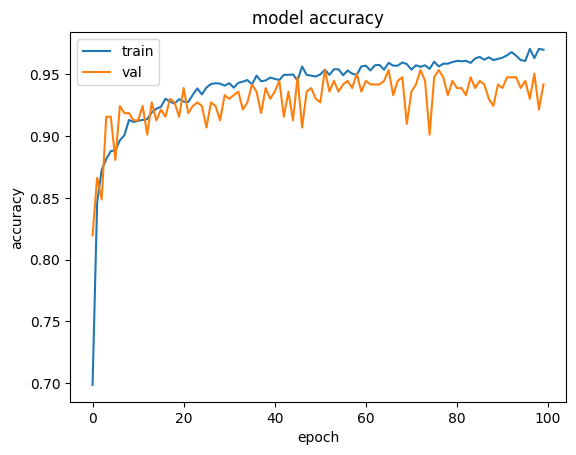

In [56]:
import keras
from matplotlib import pyplot as plt
history = model.fit(X_train,y_train,validation_split = 0.1,batch_size=8,epochs=100,verbose=2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [57]:
# Write the testing input and output variables
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9385 - loss: 0.1844
Test loss: 0.17776402831077576
Test accuracy: 0.9337209463119507


In [62]:
# Write the index of the test sample to test
prediction = model.predict(X_test[35].reshape(1,14))
print(prediction[0])
print(np.round(prediction[0]))
print(y_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[2.4712629e-15 9.8236692e-01 1.7633095e-02]
[0. 1. 0.]
[0. 1. 0.]


In [64]:
# Write the index of the test sample to test
prediction = model.predict(X_test)
print(prediction)
print(np.round(prediction))
print(y_test)
y_pred=np.round(prediction)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1.71980631e-18 2.06426457e-01 7.93573558e-01]
 [1.69445786e-15 9.70172882e-01 2.98271086e-02]
 [9.19180747e-13 9.45978045e-01 5.40219732e-02]
 ...
 [2.63489285e-19 9.96313393e-01 3.68662155e-03]
 [1.74804046e-18 8.22447717e-01 1.77552253e-01]
 [6.54624278e-16 9.89633203e-01 1.03668505e-02]]
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


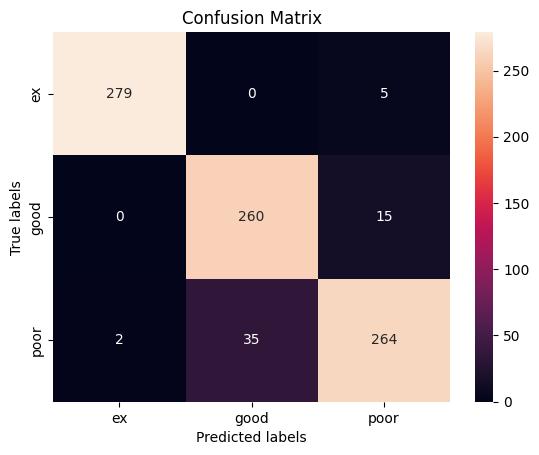

In [67]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['ex','good','poor']

ax= plt.subplot()

cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);